In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df= pd.read_csv("C:\\Users\\admin\\Desktop\\simple linear regression\\delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Correlation

In [6]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x26fea2f2280>,
 'caps': [<matplotlib.lines.Line2D at 0x26fea2f28e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fea2f20d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26fea2f2dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fea3040d0>],
 'means': []}

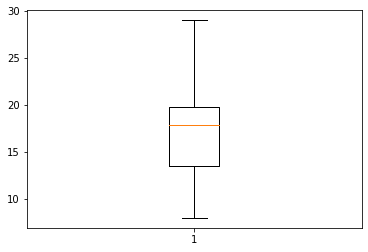

In [7]:
plt.boxplot(df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26fea3d58b0>,
 'caps': [<matplotlib.lines.Line2D at 0x26fea3d5e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fea3d55e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26fea3e5460>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fea3e5730>],
 'means': []}

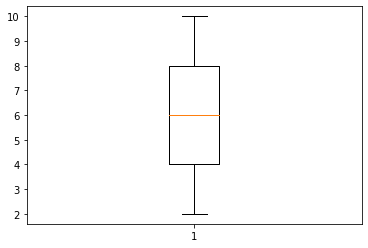

In [8]:
plt.boxplot(df['Sorting Time'])

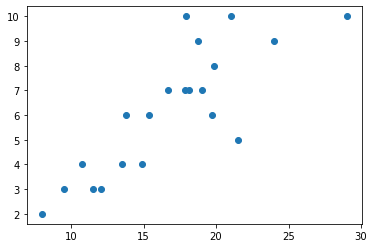

In [9]:
plt.scatter(df['Delivery Time'],df['Sorting Time'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

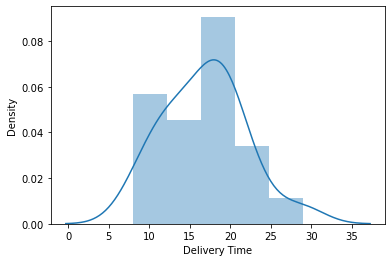

In [10]:
sns.distplot(df['Delivery Time'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

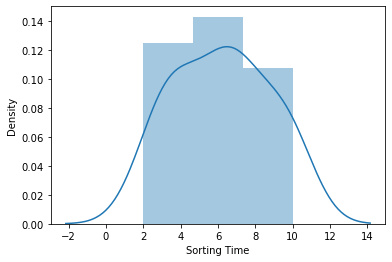

In [11]:
sns.distplot(df['Sorting Time'])

In [12]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


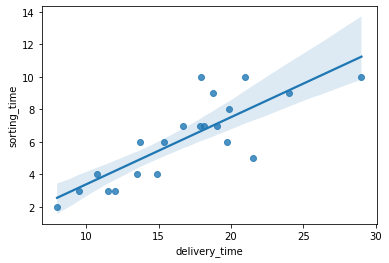

In [13]:
sns.regplot(x= "delivery_time",y="sorting_time",data=df);

# Fitting a Linear Regression Model

In [24]:
import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data=df).fit()

In [25]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [51]:
print(model1.tvalues, '\n',model1.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [27]:
(model1.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        13:39:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=df).fit()

In [31]:
print(model2.params,'\n''\n', model2.pvalues)

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 

 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [32]:
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 04 Aug 2022   Prob (F-statistic):           1.60e-07
Time:                           13:48:30   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model3=smf.ols("delivery_time~np.square(sorting_time)",data=df).fit()

In [37]:
print(model3.params,'\n''\n', model3.tvalues,'\n''\n', model3.pvalues)

Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 

 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 

 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [39]:
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [40]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.74e-05
Time:                        13:55:28   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model4=smf.ols("delivery_time~np.sqrt(sorting_time)",data=df).fit()

In [42]:
print(model4.params,'\n''\n', model4.tvalues,'\n''\n', model4.pvalues)

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 

 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 

 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.61e-06
Time:                        14:02:54   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
df1=model2.predict(df)

In [48]:
df1

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [49]:
df=pd.concat([df,df1],axis=1)
df

,delivery_time,sorting_time,0
0,21.00,10,3.117833
1,13.50,4,2.570329
2,19.75,6,2.812603
3,24.00,9,3.054878
4,29.00,10,3.117833
5,15.35,6,2.812603
6,19.00,7,2.904712
7,9.50,3,2.398432
8,17.90,10,3.117833
9,18.75,9,3.054878


Frome all above 2nd model is suitable